In [ ]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 81.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=ce06a75ff99bc8e1b933f5e079dcb72668d4eaed1c3ab37fefb1921312daf4f5
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.datasets import make_classification
from collections import Counter
from sklearn.preprocessing import MinMaxScaler

EDA

In [ ]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
dataset_path = '/content/drive/My Drive/LfD_Project/student_mat.csv'

In [ ]:
raw_data = pd.read_csv(dataset_path, delimiter=',')

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
raw_data.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

In [ ]:
raw_data.columns

Index(['famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason',
       'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup',
       'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet',
       'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2', 'G3'],
      dtype='object')

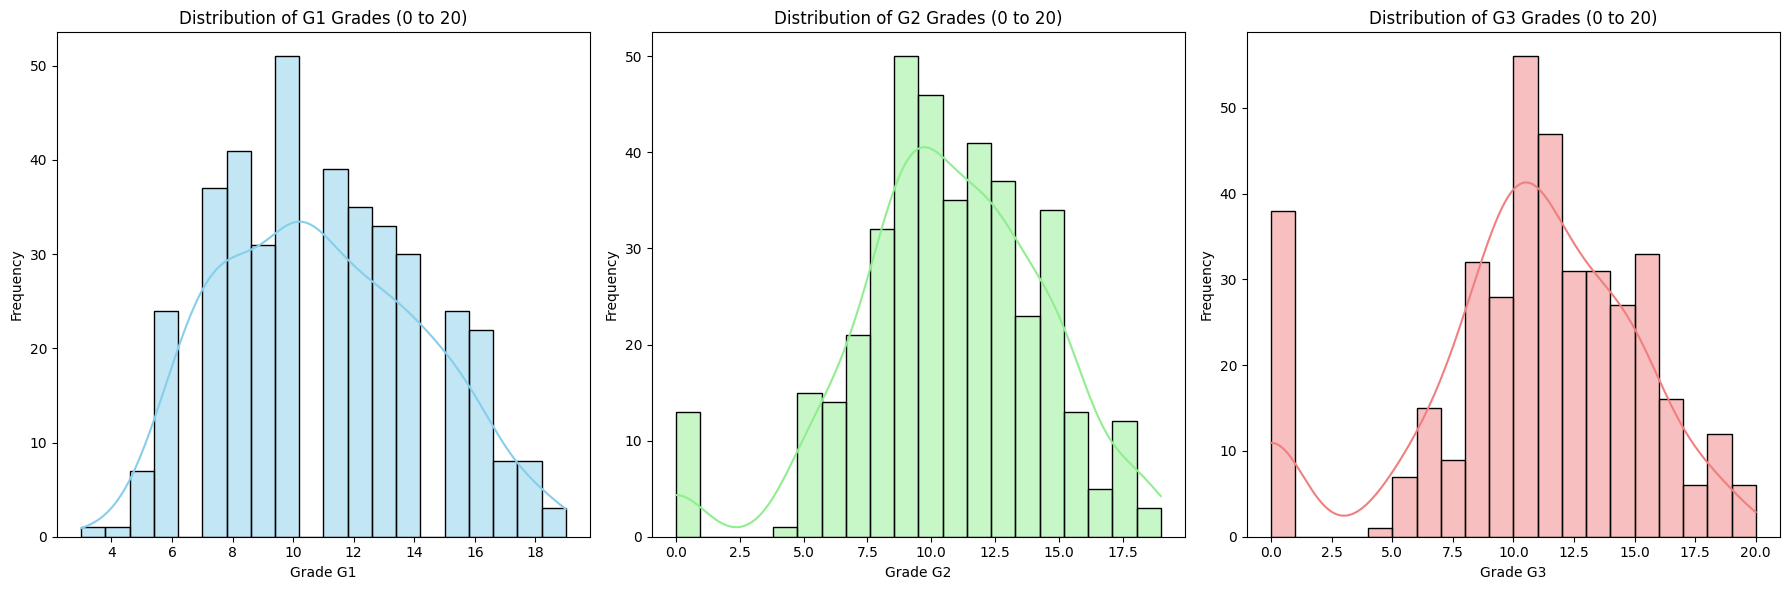

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.histplot(raw_data['G1'], kde=True, bins=20, color='skyblue', ax=axes[0])
axes[0].set_title('Distribution of G1 Grades (0 to 20)')
axes[0].set_xlabel('Grade G1')
axes[0].set_ylabel('Frequency')

sns.histplot(raw_data['G2'], kde=True, bins=20, color='lightgreen', ax=axes[1])
axes[1].set_title('Distribution of G2 Grades (0 to 20)')
axes[1].set_xlabel('Grade G2')
axes[1].set_ylabel('Frequency')

sns.histplot(raw_data['G3'], kde=True, bins=20, color='lightcoral', ax=axes[2])
axes[2].set_title('Distribution of G3 Grades (0 to 20)')
axes[2].set_xlabel('Grade G3')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
pd.set_option("display.max_columns",35)

In [ ]:
raw_data.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

   reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0  course   mother           2          2         0       yes     no   no   
1  course   father           1          2         0        no    yes   no   
2   other   mother           1          2         3       yes     no  yes   
3    home   mother           1          3         0        no    yes  yes   
4    home   father           1          2         0        no    yes  yes   

  activities nursery higher internet romantic  famrel  freetime  goout  Dalc  \
0         no     yes    yes       no       no       4         3      4     1   
1         no      no    yes      yes       no       5         3      3     1   
2         no     yes    yes      yes       no       4         3      2     2   
3        yes     yes    yes      yes      yes       3         2      2     1   
4         no     yes    yes       no       no       4         3      2     1   

   Walc  health  absences  G1  G2  G3  
0     1       3         6   5   6   6  
1     1       3         4   5   5   6  
2     3       3        10   7   8  10  
3     1       5         2  15  14  15  
4     2       5         4   6  10  10

Checking duplicates in the recrods

In [ ]:
duplicates = raw_data.duplicated()
raw_data[duplicates].sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: object

In [ ]:
raw_data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [ ]:
my_report= ProfileReport(raw_data, title="profile of data", explorative=True)
my_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Checking Missing values


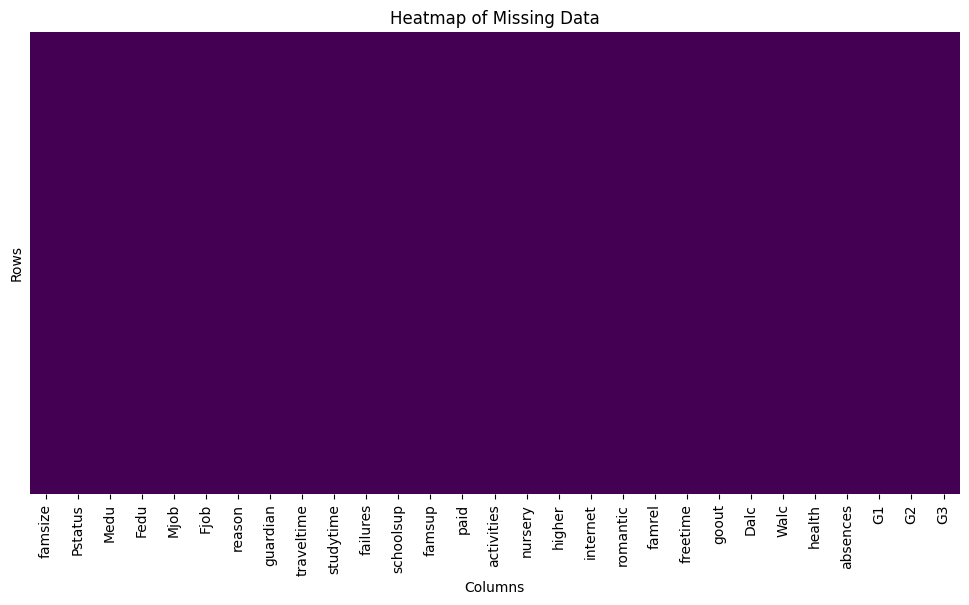

In [ ]:
missing_data = raw_data.isnull()
plt.figure(figsize=(12, 6))
sns.heatmap(missing_data, cbar=False, cmap='viridis', yticklabels=False, xticklabels=raw_data.columns)
plt.title('Heatmap of Missing Data')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [ ]:
missing_values_per_column = raw_data.isnull().sum()
print("Missing values per column:\n", missing_values_per_column)

Missing values per column:
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [ ]:
total_missing = raw_data.isnull().sum().sum()
print("\nTotal missing values in DataFrame:", total_missing)


Total missing values in DataFrame: 0


Feature Engineering

In [ ]:
raw_data.drop(['school','address','age','sex'], axis=1, inplace=True)

KeyError: "['school', 'address', 'age', 'sex'] not found in axis"

Encoding the categorical values


In [ ]:
binary_cols = ['famsize','Pstatus', 'famsup', 'paid', 'activities','nursery', 'higher', 'internet', 'romantic','schoolsup', 'Fjob','guardian','reason','Mjob']

In [ ]:
binary_map = {'yes': 1, 'no': 0,'GT3':1,'LE3':0,'A':1,'T':0,'father':1,'mother':0, 'other':3,
              'course': 0 ,'home':1,'reputation':2, 'at_home':0, 'health':1, 'services':2,'teacher':4}
for col in binary_cols:
    if set(raw_data[col].unique()).issubset(binary_map.keys()):
        raw_data[col] = raw_data[col].map(binary_map)

In [ ]:
raw_data['Fjob'].unique(), raw_data['Mjob'].unique()

(array([4, 3, 2, 1, 0]), array([0, 1, 3, 2, 4]))

In [ ]:
raw_data['guardian'].unique()

array([0, 1, 3])

In [ ]:
raw_data['Mjob'].unique()

array([0, 1, 3, 2, 4])

In [ ]:
raw_data['reason'].unique()

array([0, 3, 1, 2])

In [ ]:
raw_data.head()

famsize  Pstatus  Medu  Fedu  Mjob  Fjob  reason  guardian  traveltime  \
0        1        1     4     4     0     4       0         0           2   
1        1        0     1     1     0     3       0         1           1   
2        0        0     1     1     0     3       3         0           1   
3        1        0     4     2     1     2       1         0           1   
4        1        0     3     3     3     3       1         1           1   

   studytime  failures  schoolsup  famsup  paid  activities  nursery  higher  \
0          2         0          1       0     0           0        1       1   
1          2         0          0       1     0           0        0       1   
2          2         3          1       0     1           0        1       1   
3          3         0          0       1     1           1        1       1   
4          2         0          0       1     1           0        1       1   

   internet  romantic  famrel  freetime  goout  Dalc  Walc  health  absences  \
0         0         0       4         3      4     1     1       3         6   
1         1         0       5         3      3     1     1       3         4   
2         1         0       4         3      2     2     3       3        10   
3         1         1       3         2      2     1     1       5         2   
4         0         0       4         3      2     1     2       5         4   

   G1  G2  G3  
0   5   6   6  
1   5   5   6  
2   7   8  10  
3  15  14  15  
4   6  10  10

from matplotlib import pyplot as plt
_df_0['famsize'].plot(kind='hist', bins=20, title='famsize')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Pstatus'].plot(kind='hist', bins=20, title='Pstatus')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Medu'].plot(kind='hist', bins=20, title='Medu')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Fedu'].plot(kind='hist', bins=20, title='Fedu')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='famsize', y='Pstatus', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Pstatus', y='Medu', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Medu', y='Fedu', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Fedu', y='Mjob', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Mjob']
  ys = series['famsize']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Mjob', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Mjob')
_ = plt.ylabel('famsize')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Mjob']
  ys = series['Pstatus']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Mjob', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Mjob')
_ = plt.ylabel('Pstatus')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Mjob']
  ys = series['Medu']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Mjob', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Mjob')
_ = plt.ylabel('Medu')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Mjob']
  ys = series['Fedu']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Mjob', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Mjob')
_ = plt.ylabel('Fedu')

from matplotlib import pyplot as plt
_df_12['famsize'].plot(kind='line', figsize=(8, 4), title='famsize')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Pstatus'].plot(kind='line', figsize=(8, 4), title='Pstatus')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Medu'].plot(kind='line', figsize=(8, 4), title='Medu')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Fedu'].plot(kind='line', figsize=(8, 4), title='Fedu')
plt.gca().spines[['top', 'right']].set_visible(False)

EDA - outliers using Z-Score

In [ ]:
means = raw_data.mean()
std_devs = raw_data.std()
z_scores = (raw_data - means) / std_devs
threshold = 4

outliers = raw_data[(z_scores.abs() > threshold).any(axis=1)]

print(f"Number of outliers: {len(outliers)}")
if not outliers.empty:
    print("\nIndices of outliers:")
    print(outliers.index.tolist())
    print("\nSample of outliers:")
    print(outliers.head())
else:
    print("No outliers detected.")

Number of outliers: 53

Indices of outliers:
[2, 18, 25, 29, 61, 66, 74, 78, 100, 108, 127, 134, 144, 146, 148, 149, 150, 153, 157, 160, 163, 164, 165, 166, 173, 183, 184, 206, 207, 223, 228, 236, 239, 247, 250, 252, 269, 276, 280, 299, 307, 311, 315, 327, 349, 350, 352, 357, 361, 371, 375, 389, 392]

Sample of outliers:
    famsize  Pstatus  Medu  Fedu  Mjob  Fjob  reason  guardian  traveltime  \
2         0        0     1     1     0     3       3         0           1   
18        1        0     3     2     2     2       0         0           1   
25        1        0     2     2     2     2       1         0           1   
29        1        0     4     4     4     4       1         0           1   
61        1        0     1     1     2     2       0         1           4   

    studytime  failures  schoolsup  famsup  paid  activities  nursery  higher  \
2           2         3          1       0     1           0        1       1   
18          1         3          0       1    

In [ ]:
features = raw_data.drop(columns='G3')
scaler = MinMaxScaler()

normalized_features = scaler.fit_transform(features)
ready_data = pd.DataFrame(normalized_features, columns=features.columns)
ready_data['G3'] = raw_data['G3']

In [ ]:
ready_data.head()

famsize  Pstatus  Medu  Fedu  Mjob  Fjob    reason  guardian  traveltime  \
0      1.0      1.0  1.00  1.00  0.00  1.00  0.000000  0.000000    0.333333   
1      1.0      0.0  0.25  0.25  0.00  0.75  0.000000  0.333333    0.000000   
2      0.0      0.0  0.25  0.25  0.00  0.75  1.000000  0.000000    0.000000   
3      1.0      0.0  1.00  0.50  0.25  0.50  0.333333  0.000000    0.000000   
4      1.0      0.0  0.75  0.75  0.75  0.75  0.333333  0.333333    0.000000   

   studytime  failures  schoolsup  famsup  paid  activities  nursery  higher  \
0   0.333333       0.0        1.0     0.0   0.0         0.0      1.0     1.0   
1   0.333333       0.0        0.0     1.0   0.0         0.0      0.0     1.0   
2   0.333333       1.0        1.0     0.0   1.0         0.0      1.0     1.0   
3   0.666667       0.0        0.0     1.0   1.0         1.0      1.0     1.0   
4   0.333333       0.0        0.0     1.0   1.0         0.0      1.0     1.0   

   internet  romantic  famrel  freetime  goout  Dalc  Walc  health  absences  \
0       0.0       0.0    0.75      0.50   0.75  0.00  0.00     0.5  0.080000   
1       1.0       0.0    1.00      0.50   0.50  0.00  0.00     0.5  0.053333   
2       1.0       0.0    0.75      0.50   0.25  0.25  0.50     0.5  0.133333   
3       1.0       1.0    0.50      0.25   0.25  0.00  0.00     1.0  0.026667   
4       0.0       0.0    0.75      0.50   0.25  0.00  0.25     1.0  0.053333   

       G1        G2  G3  
0  0.1250  0.315789   6  
1  0.1250  0.263158   6  
2  0.2500  0.421053  10  
3  0.7500  0.736842  15  
4  0.1875  0.526316  10

In [ ]:
dataset_path = '/content/drive/My Drive/LfD_Project/'
file_name = 'ready_data.csv'

full_path = dataset_path + file_name

ready_data.to_csv(full_path, index=False)